##  Connect Intensive - Machine Learning Nanodegree
### Lesson 02: Building and evaluating models with `sklearn`

## Objectives
  - Use the `pandas` library to learn how to preprocess data 
  - Use the `sklearn` library to build a predictive `DecisionTreeClassifier` model for the Titanic Survival Dataset.
  - Compute the accuracy of a model on both the training and validation (testing) data.
  - Adjust hyperparameters (e.g. `max_depth`) to see the effects on model accuracy.
  - (Optional) Visualize the model to understand how complexity leads to high variance.
  
#### Optional Prerequisites
  - Optional prerequisites for visualizing the decision trees.
    - Install [graphviz](http://graphviz.org/), graph visualization software.
      - If you use [homebrew](http://brew.sh/), there's [a brew formula available for graphviz](http://brewformulas.org/Graphviz)
    - Install [pydotplus](https://pypi.python.org/pypi/pydotplus), a Python interface to Graphviz's Dot language


## Acknowledgements
  - This lesson is adapted from part 2 of Thomas Corcoran's excellent [`sklearn` tutorial](https://github.com/tccorcoran/Connect/tree/master/sklearn-tutorial). Thank you Thomas!

## Getting Started
As usual, we start by importing some useful libraries and modules. Don't worry if you get a warning message when importing `matplotlib` -- it just needs to build the font cache, and the warning is just to alert you that this may take a while the first time the cell is run.

**Run** the cell below (**click** the cell to highlight it, then press **shift + enter** or **shift + return**) to import useful libraries for this notebook.

In [45]:
%matplotlib inline
try:
    import matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    print("Successfully imported matplotlib.pyplot! (Version {})".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib.pyplot!")
    
try:
    import numpy as np
    print("Successfully imported numpy! (Version {})".format(np.version.version))
except ImportError:
    print("Could not import numpy!")
    
try:
    import pandas as pd
    print("Successfully imported pandas! (Version {})".format(pd.__version__))
    pd.options.display.max_rows = 10
except ImportError:
    print("Could not import pandas!")

try:
    from IPython.display import display
    print("Successfully imported display from IPython.display!")
except ImportError:
    print("Could not import display from IPython.display")
    
try:
    import sklearn
    print("Successfully imported sklearn! (Version {})".format(sklearn.__version__))
    skversion = int(sklearn.__version__[2:4])
except ImportError:
    print("Could not import sklearn!")

Successfully imported matplotlib.pyplot! (Version 2.1.2)
Successfully imported numpy! (Version 1.14.1)
Successfully imported pandas! (Version 0.20.3)
Successfully imported display from IPython.display!
Successfully imported sklearn! (Version 0.19.1)


## Loading the data from the Titanic project

#### *You will need to specify the proper path to the dataset file or copy the file into the same directory as this notebook*


**Run** the cell below (**click** on the cell to highlight it, then press **shift + enter** or **shift + return** to run it) to read the preprocessed training and testing data into `pandas` `DataFrame` objects.

In [46]:
train_df = pd.read_csv("./projects/titanic_survival_exploration/titanic_data.csv")

print("Titanic data sets loaded!")

Titanic data sets loaded!


All machine learning projects start with data exploration. In this phase, you look to see what the data looks like, check if there are values missing and prepare the data for training with `sklearn`. Preparing the data includes converting data to the right types (numeric only), scaling so the actual values of the features are of "reasonable" and similar size.

Here we will practice handling missing values and converting categorical data into numeric.

First, though, lets do a cursory examination of the data using `describe`, `head` or `info`.

In [47]:
#TODO - Use the three methods listed above to get a general sense of the data
train_df.head()

#train_df.info()

#train_df.tail()

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


If you look at the output of `decribe`, you will that the `count` for `Age` is lower than the count for all the other columns. This indicates that there are missing values in `Age` and we will need to do some preprocessing. This step is called `imputation`. One way to get rid of mising values is to replace them with a value derived from the data, e.g., the avergae. This is what we will do. Run the cell below to replace all missing `Age` values with the average over all the rows with values. 

In [48]:
train_df.loc[train_df.Age.isnull(),'Age'] = train_df.Age.mean()

Categorical variables can be replaced by a numerical map (an encoding). The `get_dummies` method is useful for this. In our dataset, we have `Sex` and `Embarked` (port where the passenger got on the ship). Run the cell below to apply a method known as one-hot-encoding and view the results.

In [49]:
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked"], prefix=["sex", "port"])
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,port_C,port_Q,port_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


Now we want to use the preprocessed data to build a predictive model.

## Further dividing the data
To train and evaluate our model, we split the available data into a training set and a test set. The test set should be used *only for evaluating* the expected performance on unseen (future) data. If we want to tune hyper-parameters of a model, compare the performance of different algorithms for model *selection*, we need to further split our training set into two parts -- the actual training set and a validation set. 

  - **Training set:** A set of examples used for machine learning, that is to fit the parameters (*i.e.*, weights) of the classifier.
  - **Validation set:** A set of examples used to tune the hyperparameters (*i.e.*, architecture, not weights) of a classifier, for example to choose the maximum depth of a decision tree, or the number of hidden layers in a neural network.
  - **Test set:** A set of examples used only *once*. This assesses the performance (generalization) of the fully-specified classifier (once all hyperparameters have been specified).

So you can think of the three groups of data this way: you build a collection of models from the same training data set. The models might all be slightly different (*e.g.* decision trees of maximum depths of 1, 2, 3, 4, ...). You then apply each of these models to the validation data set. Based on how well each of these models performs, you may select an optimal depth, which was the adjustable *hyperparameter* for the decision tree classifier. Finally, once the model and all of its adjustable parameters have been decided upon, this model can be applied to the testing data to see how well it generalizes to unknown data.

For more on testing vs. validation data sets, you can consult the [test set wikipedia article](https://en.wikipedia.org/wiki/Test_set) or [this Quora post on training and testing data](https://www.quora.com/What-is-a-training-data-set-test-data-set-in-machine-learning-What-are-the-rules-for-selecting-them).

In this case, we are working with a toy model and learn about what could go wrong, so we are going to use the test set as our validation set. In practive or in projects where you care about getting good results, you should use three sets.

## Using `train_test_split`
The latest version of the library `sklearn` has the module `model_selection`, which contains [the method `train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). We can use this method to split `train_df` further into a training and a validation set. The arguments that we need to pass to `train_test_split()` are:
  - `X` & `y`: Arrays. These can be `pandas` `DataFrame` or `Series` objects.
  - `test_size`: A float with the proportion of data to put into the test set. *e.g.* `test_size = 0.1` would put one in every ten instances into the test set.
  - `random_state`: The pseudo-random number generator state used for random sampling. For a given value of `random_state`, the method will partition the data set exactly the same way each time, which is useful for debugging.

**Run** the cell below to create the `DataFrame` object `X` and the `Series` object `y` from the desired features from `train_df`. Then use `train_test_split()` with a `random_state` to split the dataset.

In [58]:
# Starting with scikit-learn version 0.18, the model_selection module replaces the cross_validation module,
# so we should import train_test_split from the appropriate module depending on the version number.
if skversion >= 18:
    from sklearn.model_selection import train_test_split
else:
    from sklearn.cross_validation import train_test_split

# A list of the desired feature names for model building
# We are skipping Passenger ID as that is too specific and is more a row label than a feature
# Same arguments lead us to exclude `Cabin` and `Ticket`
desired_features = ['Pclass', 'sex_female', 'sex_male', 'Age','SibSp','Parch', 'Fare', 'port_C', 'port_S', 'port_Q']

# X is our pandas DataFrame object with the features from which we will predict the 'Survived' feature.
X = pd.DataFrame(train_df[desired_features])

# y is our pandas Series object with the 'Survived' feature to be predicted.
y = pd.Series(train_df['Survived'])

# Split the data into training and validation (test) data sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Take a look at the first few rows of the training features and classes
display(X_train.head())
display(y_train.head())

# Verify that the data sets were split 80% training and 20% testing
print("The original data ({} instances) was split into training ({} instances) and testing ({} instances) data sets".\
     format(len(X),len(X_train),len(X_test)))

,Pclass,sex_female,sex_male,Age,SibSp,Parch,Fare,port_C,port_S,port_Q
146,3,0,1,27.0,0,0,7.7958,0,1,0
195,1,1,0,58.0,0,0,146.5208,1,0,0
786,3,1,0,18.0,0,0,7.4958,0,1,0
290,1,1,0,26.0,0,0,78.8500,0,1,0
521,3,0,1,22.0,0,0,7.8958,0,1,0


146    1
195    1
786    1
290    1
521    0
Name: Survived, dtype: int64

The original data (891 instances) was split into training (712 instances) and testing (179 instances) data sets


Check out the indices on `X_train.head()` and `y_train.head()` -- they match, as expected, but they're shuffled, which may be unexpected! Also, the print statement above shows us that `train_test_split()` is partitioning the data based on the given `test_size` argument. Great!

## Building a Decision Tree Classifier
For supervised learning problems, the model building `sklearn` workflow is pretty similar, regardless of the type of classifier you'd like to build:
  1. **Create** a classifier object.
  2. **Train** the classifier on the training data set.
  3. **Predict** with the classifier on the validation (test) data set.
  4. **Assess** the accuracy of the classifier, comparing the predictions to the actual labels.

Let's try it here! Let's build a [Decision Tree Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of `max_depth` 1. We will need to import `DecisionTreeClassifier` and `accuracy_score` from the appropriate `sklearn` modules.

**Run** the cell below to **create** a Decision Tree Classifier, **train** it on the training data, **predict** class labels for the validation (test) data set, and **assess** the accuracy of the classifier.

In [59]:
# Import DecisionTreeClassifier, f1-score and accuracy_score from the appropriate sklearn modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#TODO - Steps 1 - 4
# 1. CREATE the classifier object... in this example, call it clf1. Use the defaults for all the hyperparameters
clf1=DecisionTreeClassifier()

# 2. TRAIN the classifier object o X_train, y_train using the method .fit()
clf1.fit(X_train, y_train)

# 3. PREDICT labels for the validation (test) set using the method .predict()
y_pred_train = clf1.predict(X_train)
y_pred_test  = clf1.predict(X_test)

# 4. ASSESS the accuracy of the classifier, comparing the predictions to the actual labels.
print ('Train score', accuracy_score(y_train, y_pred_train))
print ('Test score', accuracy_score(y_test, y_pred_test))

('Train score', 0.9831460674157303)
('Test score', 0.7821229050279329)


We see that the accuracy on the training data is great, but our accuracy on the testing data is not.

As part of the fit process, the classifier records the relative importance of each of the features in an attribute called `feature_importances_`. They are listed in column order. Run the next cell to see the results.

In [63]:
features = zip(clf1.feature_importances_, X_train.columns)
features.sort(reverse=True)
features

[(0.30426266978874744, 'sex_male'),
 (0.24943634599292266, 'Fare'),
 (0.23631712433386146, 'Age'),
 (0.12166110367050363, 'Pclass'),
 (0.04651000586029909, 'SibSp'),
 (0.025183211952134573, 'Parch'),
 (0.008395798285088204, 'port_S'),
 (0.0051304180896366, 'port_C'),
 (0.0031033220268063487, 'port_Q'),
 (0.0, 'sex_female')]

## Visualizing a Decision Tree (Optional)
Some advantages to a decision tree classifier are that the classification process is simple to understand and interpret, and the decision tree can be easily visualized. Looking into the `sklearn` [documentation on Decision Trees](http://scikit-learn.org/stable/modules/tree.html), we see that there is a method, `export_graphviz`, where we can visualize the decision tree in [Graphviz format](http://www.graphviz.org/). Getting this working on your machine may be a little tricky, because there's an additional application and Python module needed, but I think the payoff is worth it.
  1. You need to install the [Graphviz](http://www.graphviz.org/) application. Note that [`pip install graphviz`](https://pypi.python.org/pypi/graphviz) is **not** sufficient. It does not install the Graphviz application.
  2. You need to install [the module `pydotplus`](https://pypi.python.org/pypi/pydotplus)
  
Once you've completed the installation prerequisites above, **run** the cell below to visualize the Decision Tree Classifier you created above with `max_depth` 1

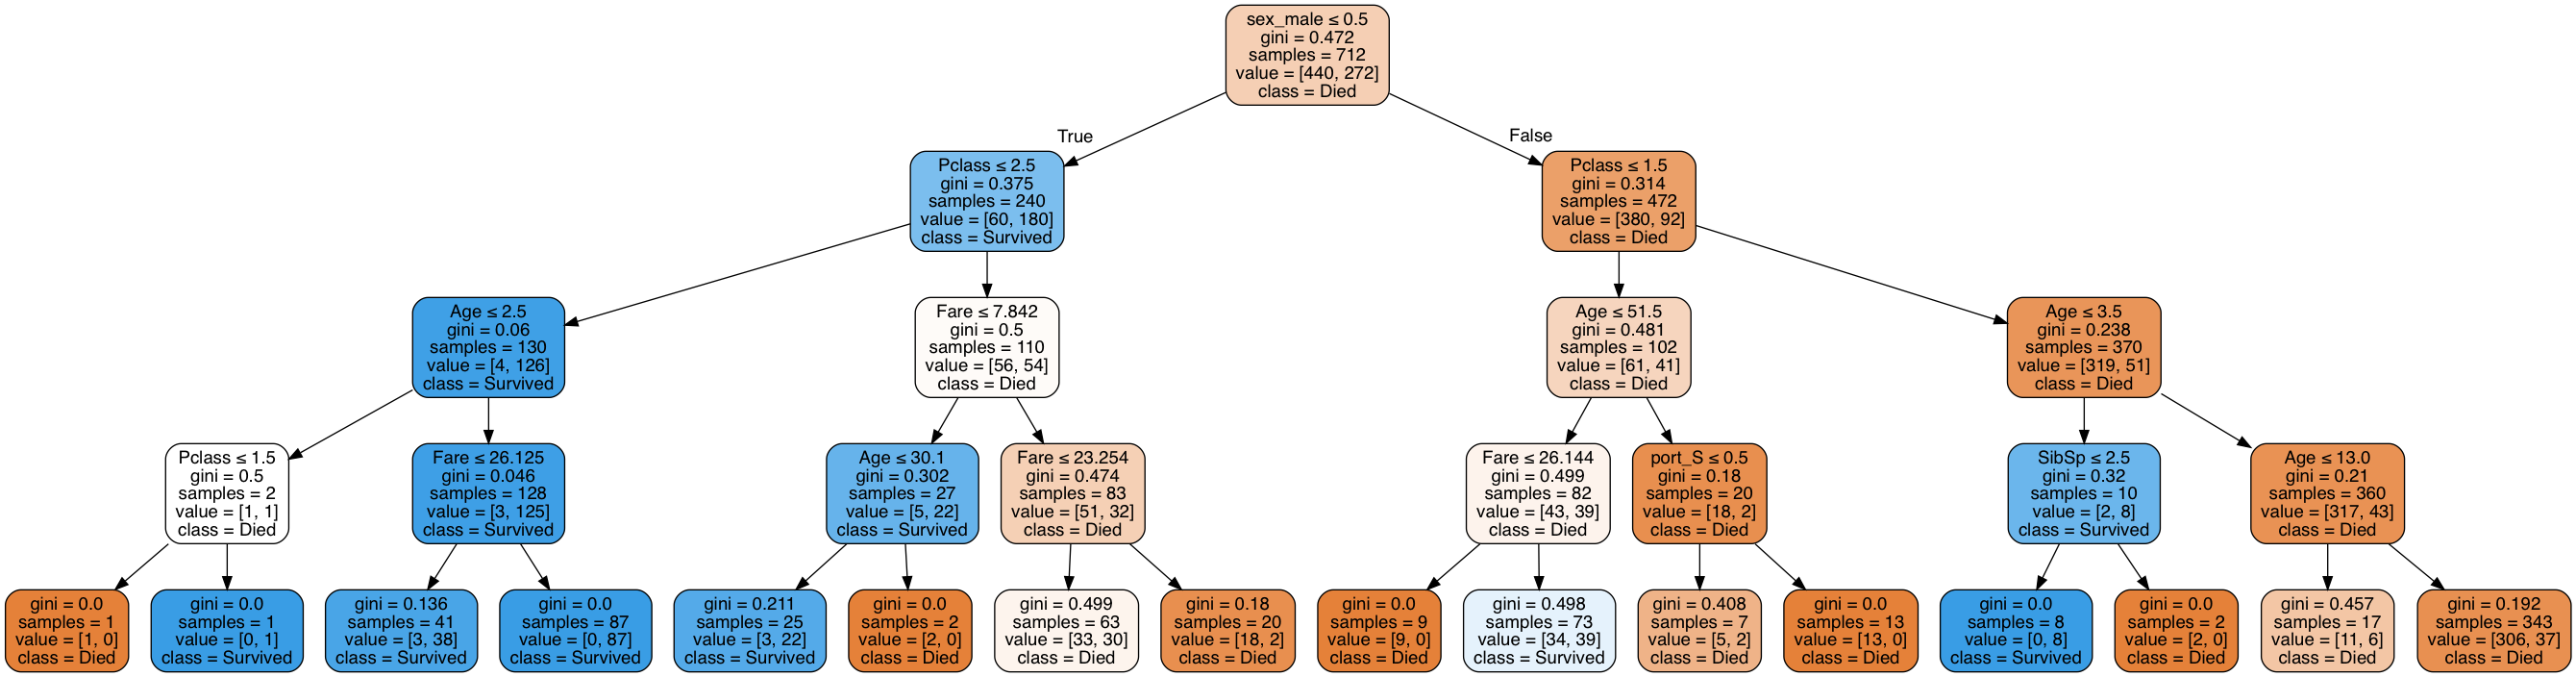

In [44]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = export_graphviz(clf1, out_file=None, 
                         feature_names=desired_features,  
                         class_names=['Died','Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [64]:
# Look out for the following terms: Cross validation & Grid Search